# Data Analytic Project: Bike Sharing Dataset
- **Name:** Andhika Primaditama
- **Email:** dikadanke@gmail.com
- **ID Dicoding:** dikadanke

## Defining Business Questions

* How does the time of day influence bike-sharing ride usage?
* What are the trends in bike-sharing rides across different days of the week?
* How does bike-sharing usage vary by month?
* Do weather and seasonal changes impact bike-share ridership?

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

---



In [2]:
day = pd.read_csv("https://github.com/andhikaprimaditama22/Dicoding-Capital-Bike-Sharing-Analysis/raw/refs/heads/main/data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = pd.read_csv("https://github.com/andhikaprimaditama22/Dicoding-Capital-Bike-Sharing-Analysis/raw/refs/heads/main/data/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Both `hour.csv` and `day.csv` have the same fields, except for hr, which is not available in `day.csv.`
- To simplify working with the dataset, I uploaded it to GitHub, allowing it to be loaded independently without requiring local access.

### Assessing Data

---



Assesing `Day`

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print('Number of Duplications: ', day.duplicated().sum())
day.describe()

Number of Duplications:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assessing `hour`

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
print('Number of Duplicates: ', hour.duplicated().sum())
hour.describe()

Number of Duplicates:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- There are no missing values or duplicated data in either dataset.
- Change the `dteday` variable to the date data type.
- The `weekday`, `mnth`, `weather` and `season` variables are currently represented as integers, and we will convert them into their corresponding string values.
- We will update the `yr` variable, which currently represents 0 for the year 2011 and 1 for the year 2012, to reflect the actual years.
- The `temp`, `atemp`, `hum`, and `windspeed` variables have been normalized. To more accurately represent real-world conditions, we will revert these values back to their original, unnormalized state.

### Cleaning Data

---



#### Cleaning `Day` Dataframe

##### Convert the data type of the date column from an object to datetime format.

In [10]:
day['dteday'] = pd.to_datetime(day['dteday'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Adjust the values of the `weekday`, `month`, `year`, `weather` and `season` variables to their correct representations.

In [11]:
day_adjust = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

day['weekday'] = day['weekday'].map(day_adjust)
day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,Sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [12]:
month_adjust = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                9: 'September', 10: 'October', 11: 'November', 12: 'December'}

day['mnth'] = day['mnth'].map(month_adjust)
day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,Sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,Monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,Tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [13]:
year_adjust = {0: '2011', 1: '2012'}

day['yr'] = day['yr'].map(year_adjust)
day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,January,0,Sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,January,0,Monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,January,0,Tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [14]:
weather_adjust = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4:'Heavy Rain'}

day['weathersit'] = day['weathersit'].map(weather_adjust)
day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [15]:
season_adjust = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4:'Fall'}

day['season'] = day['season'].map(season_adjust)
day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349


##### Revert the values of the `temp`, `atemp`, `hum`, and `windspeed` variables to their pre-normalized state.

In [16]:
day['temp'] = day['temp']*41
day['atemp'] = day['atemp']*50
day['hum'] = day['hum']*100
day['windspeed'] = day['windspeed']*67

In [17]:
day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349


#### Cleaning `hour` Dataframe

##### Convert the data type of the date column from an object to datetime format.

In [18]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Adjust the values of the `weekday`, `month`, `year`, `weather` and `season` variables to their correct representations.

In [19]:
day_adjust = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

hour['weekday'] = hour['weekday'].map(day_adjust)
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [20]:
month_adjust = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                9: 'September', 10: 'October', 11: 'November', 12: 'December'}

hour['mnth'] = hour['mnth'].map(month_adjust)
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [21]:
year_adjust = {0: '2011', 1: '2012'}

hour['yr'] = hour['yr'].map(year_adjust)
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,January,0,0,Sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,January,1,0,Sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,January,2,0,Sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [22]:
weather_adjust = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4:'Heavy Rain'}

hour['weathersit'] = hour['weathersit'].map(weather_adjust)
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,January,0,0,Sunday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,January,1,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,January,2,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32


In [23]:
season_adjust = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4:'Fall'}

hour['season'] = hour['season'].map(season_adjust)
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Sunday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32


##### Revert the values of the `temp`, `atemp`, `hum`, and `windspeed` variables to their pre-normalized state.

In [24]:
hour['temp'] = hour['temp']*41
hour['atemp'] = hour['atemp']*50
hour['hum'] = hour['hum']*100
hour['windspeed'] = hour['windspeed']*67

In [25]:
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Sunday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,5,27,32


**Insight:**
- The `dteday` variable has been changed to the date data type.
- The `weekday`, `mnth`, `weather`, and `season` variables have been represented as strings according to their values.
- The `yr` variable has been represented according to the actual years.
- The `temp`, `atemp`, `hum`, and `windspeed` variables have been reverted back to their pre-normalized state.

## Exploratory Data Analysis (EDA)


---





### Explore `day`

In [26]:
day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
149,150,2011-05-30,Spring,2011,May,1,Tuesday,0,Clear,30.066653,33.55460,68.5000,8.792075,1549,2549,4098
264,265,2011-09-22,Summer,2011,September,0,Friday,1,Mist,25.761653,27.74815,90.2083,8.584375,555,4240,4795
176,177,2011-06-26,Summer,2011,June,0,Monday,0,Clear,27.880000,31.88145,51.3333,6.333731,1920,3385,5305
650,651,2012-10-12,Fall,2012,October,0,Saturday,1,Clear,17.937500,21.65355,53.9167,15.751164,1060,6222,7282
84,85,2011-03-26,Spring,2011,March,0,Sunday,0,Clear,10.899153,12.87855,39.4167,14.041257,981,1515,2496


In [27]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,2012,January,NaN,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### **Number of daily rides**

In [28]:
day.groupby(by="weekday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["max", "min", "mean", "sum"]
})

dteday  casual registered   cnt                           
          nunique     sum        sum   max   min         mean     sum
weekday                                                              
Friday        104   61460     423935  7804   431  4667.259615  485395
Monday        105  140521     303506  8227   605  4228.828571  444027
Saturday      104   78238     409552  8362  1167  4690.288462  487790
Sunday        105  153852     323955  8714   627  4550.542857  477807
Thursday      104   57319     415729  8173   441  4548.538462  473048
Tuesday       105   70784     384719  7525    22  4338.123810  455503
Wednesday     104   57843     411266  7767   683  4510.663462  469109

*   ##### Based on daily rides, it can be seen that the highest number of rides occurs on **Saturday**, with a total of 487,790 and an average of 4,690.28.

##### **Number of rides based on workingday**




In [29]:
day.groupby(by="workingday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["max", "min", "mean", "sum"]
})

dteday  casual registered   cnt                           
           nunique     sum        sum   max  min         mean      sum
workingday                                                            
0              231  316732     683537  8714  605  4330.168831  1000269
1              500  303285    1989125  8362   22  4584.820000  2292410

*   Weekday is represent by 1 and weekend is represent by 0.
*   Based on workding day, tt can be seen that the highest number of rides occurs on **Weekday**, with a total of 2,292,410 and an average of 4,584.82.



##### **Number of rides by month over a span of 2 years.**

In [30]:
day.groupby(by=["yr", "mnth"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["max", "min", "mean", "sum"]
})

dteday casual registered   cnt                           
               nunique    sum        sum   max   min         mean     sum
yr   mnth                                                                
2011 April          30  22346      72524  5312   795  3162.333333   94870
     August         31  28842     107849  5895  1115  4409.387097  136691
     December       31   8448      78875  3940   705  2816.870968   87323
     February       28   6242      41973  2927  1005  1721.964286   48215
     January        31   3073      35116  1985   431  1231.903226   38189
     July           31  36452     104889  6043  3285  4559.387097  141341
     June           30  30612     112900  5515  3767  4783.733333  143512
     March          31  12826      51219  3239   605  2065.967742   64045
     May            31  31050     104771  5805  2633  4381.322581  135821
     November       30  15594      86573  4486  1495  3405.566667  102167
     October        31  25222      98289  5511   627  3984.225806  123511
     September      30  26545     100873  5423  1842  4247.266667  127418
2012 April          30  38456     135768  7460  1027  5807.466667  174224
     August         31  43197     171306  7865  4549  6919.451613  214503
     December       31  13245     110468  6606   441  3990.741935  123713
     February       29   8721      94416  5062  1529  3556.448276  103137
     January        31   8969      87775  4521  1301  3120.774194   96744
     July           31  41705     161902  8173  4459  6567.967742  203607
     June           30  43294     159536  8120  4127  6761.000000  202830
     March          31  31618     133257  8362  3194  5318.548387  164875
     May            31  44235     151630  8294  2843  6318.225806  195865
     November       30  21009     131655  6852  2277  5088.800000  152664
     October        31  34538     164303  8156    22  6414.225806  198841
     September      30  43778     174795  8714  4073  7285.766667  218573

*   In 2011, the highest number of bike-sharing rides occurred in June, totaling 143,512 rides. In 2012, the peak was in September, with a total of 218,573 rides.

### Explore `hour`

##### **Number of rides based on weather**

In [31]:
hour.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["max", "min", "mean", "sum"]
})

dteday  casual registered  cnt                         
           nunique     sum        sum  max min        mean      sum
weathersit                                                         
Clear          700  462745    1875428  977   1  204.869272  2338173
Heavy Rain       3       8        215  164  23   74.333333      223
Light Snow     300   22783     135548  891   1  111.579281   158331
Mist           567  134481     661471  957   1  175.165493   795952



*   Based on weather, the highest number of rides occured in clear with a total of 2,338,173 rides.



##### **Number of rides based on season**

In [32]:
hour.groupby(by="season").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["max", "min", "mean", "sum"]
})

dteday  casual registered  cnt                         
       nunique     sum        sum  max min        mean      sum
season                                                         
Fall       178  129782     711831  967   1  198.868856   841613
Spring     184  203522     715067  957   1  208.344069   918589
Summer     188  226091     835038  977   1  236.016237  1061129
Winter     181   60622     410726  801   1  111.114569   471348



*   Based on season, the highest number of rides occured in Summer with a total of 1,061,129 rides.



##### **Number of rides based on weather and season.**

In [33]:
hour.groupby(by=["season", "weathersit"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["max", "min", "mean", "sum"]
})

dteday  casual registered  cnt                        
                  nunique     sum        sum  max min        mean     sum
season weathersit                                                        
Fall   Clear          166   93072     453419  967   1  209.463779  546491
       Light Snow      62    4251      39419  856   1  116.453333   43670
       Mist           135   32459     218993  905   1  201.483974  251452
Spring Clear          177  151197     513266  873   1  232.410983  664463
       Light Snow      91    7413      39350  782   1  115.179803   46763
       Mist           146   44912     162451  957   1  181.261364  207363
Summer Clear          183  174014     627927  977   1  244.494207  801941
       Light Snow      72    9727      36529  891   1  171.955390   46256
       Mist           140   42350     170582  868   2  224.848997  212932
Winter Clear          174   44462     280816  801   1  122.055535  325278
       Heavy Rain       3       8        215  164  23   74.333333     223
       Light Snow      75    1392      20250  520   1   58.650407   21642
       Mist           146   14760     109445  712   1  103.074689  124205



*   Based on weather and season, the highest rides occurs during the summer season with clear weather with a total of 801,941 rides.



**Number of rides based on during working days.**

In [34]:
hour.groupby(by=["workingday", "hr"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["max", "min", "mean", "sum"]
})

dteday casual registered  cnt                        
              nunique    sum        sum  max min        mean     sum
workingday hr                                                       
0          0      230   3829      17055  249   6   90.800000   20884
           1      230   2876      13111  168   4   69.508696   15987
           2      228   2371       9752  132   2   53.171053   12123
           3      227   1465       4386   79   2   25.775330    5851
           4      227    514       1362   28   1    8.264317    1876
           5      222    383       1546   55   1    8.689189    1929
           6      229    875       3417  133   1   18.742358    4292
           7      231   1988       8039  387   1   43.406926   10027
           8      231   4718      19688  597   5  105.653680   24406
           9      231  10399      29246  397  14  171.623377   39645
           10     231  18311      40804  539  12  255.909091   59115
           11     231  24637      48201  663  27  315.316017   72838
           12     231  29163      55443  776  32  366.259740   84606
           13     231  31514      54587  760  30  372.731602   86101
           14     231  32246      51987  750  23  364.645022   84233
           15     231  31532      51354  750   7  358.813853   82886
           16     231  29710      51770  783  11  352.727273   81480
           17     231  25829      48911  731  15  323.549784   74740
           18     230  19371      45272  676  23  281.056522   64643
           19     230  15076      38209  554  11  231.673913   53285
           20     230  10756      29434  551  11  174.739130   40190
           21     230   8314      24360  584   7  142.060870   32674
           22     230   6453      20241  502   9  116.060870   26694
           23     230   4402      15362  239   2   85.930435   19764
1          0      496   3546      14700  283   2   36.786290   18246
           1      494   1833       6344  114   1   16.552632    8177
           2      487   1041       3188   74   1    8.683778    4229
           3      470    428       1895   36   1    4.942553    2323
           4      470    360       2192   17   1    5.429787    2552
           5      495    629      11703   66   1   24.913131   12332
           6      496   2142      48698  213   7  102.500000   50840
           7      496   6049     138095  596  18  290.612903  144144
           8      496  11043     225552  839  31  477.006048  236595
           9      496  12059     107734  426  23  241.518145  119793
           10     496  15478      51664  275   8  135.366935   67142
           11     496  18649      59833  361  10  158.229839   78482
           12     497  20555      79253  471   3  200.820926   99808
           13     498  21199      77619  428  11  198.429719   98818
           14     498  22843      68576  651  12  183.572289   91419
           15     498  23074      77189  601  13  201.331325  100263
           16     499  24124     122144  634  13  293.122244  146268
           17     499  28391     233729  976  26  525.290581  262120
           18     498  25125     220004  977  26  492.226908  245129
           19     498  20429     153075  743  18  348.401606  173504
           20     498  15622     108738  567  23  249.718876  124360
           21     498  12256      80515  398   6  186.287149   92771
           22     498   9747      59171  321  11  138.389558   68918
           23     498   6663      37514  256   9   88.708835   44177



*   During weekends, the peak number of rides is at 1:00 PM, totaling 86,101 rides. In contrast, on weekdays, the highest number of rides occurs at 5:00 PM, reaching a total of 262,120 rides.



## Visualization & Explanatory Analysis

---



### Question 1: How does the time of day influence bike-sharing ride usage?

In [35]:
hourly_bike_usage = hour.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_bike_usage = hourly_bike_usage.reset_index()
hourly_bike_usage.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


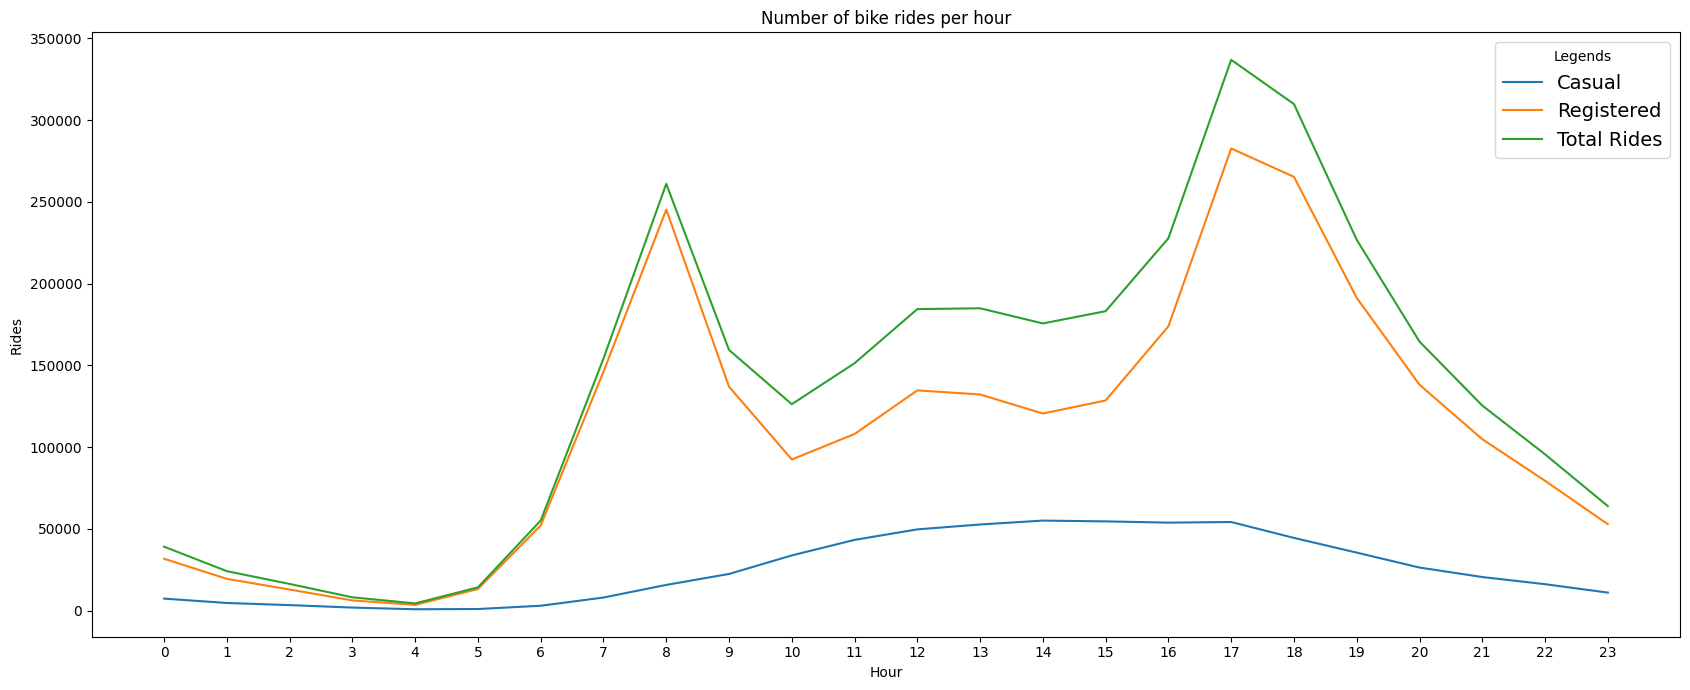

In [36]:
plt.figure(figsize=(17,7))

sns.lineplot(x="hr", y="casual", data=hourly_bike_usage, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_bike_usage, label='Registered')
sns.lineplot(x="hr", y="cnt", data=hourly_bike_usage, label="Total Rides")

plt.xlabel("Hour")
plt.ylabel("Rides")
plt.title("Number of bike rides per hour")

x = np.arange(0, 24, 1)
plt.xticks(x)
plt.legend(loc='upper right', fontsize=14, title='Legends')

plt.tight_layout()
plt.show()

**Insight:**
- As we can see in the chart above, registered bike-share rides peak at 8:00 AM and 5:00 PM.
- It is likely that registered bike-share users utilize bikes for their commuting.
- In contrast, casual bike-share rides exhibit a higher frequency throughout the day, but this begins to decline after 5:00 PM.
- It is likely that casual bike-share users are more flexible in their usage times throughout the day.

### Question 2: What is the usage pattern of bike-sharing rides based on day of the week?

In [37]:
weekly_bike_usage = day.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekly_bike_usage = weekly_bike_usage.reset_index()
weekly_bike_usage = weekly_bike_usage.melt(id_vars='weekday', value_vars=['casual', 'registered'], var_name='status', value_name='count')
weekly_bike_usage

,weekday,status,count
0,Friday,casual,61460
1,Monday,casual,140521
2,Saturday,casual,78238
3,Sunday,casual,153852
4,Thursday,casual,57319
5,Tuesday,casual,70784
6,Wednesday,casual,57843
7,Friday,registered,423935
8,Monday,registered,303506
9,Saturday,registered,409552


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


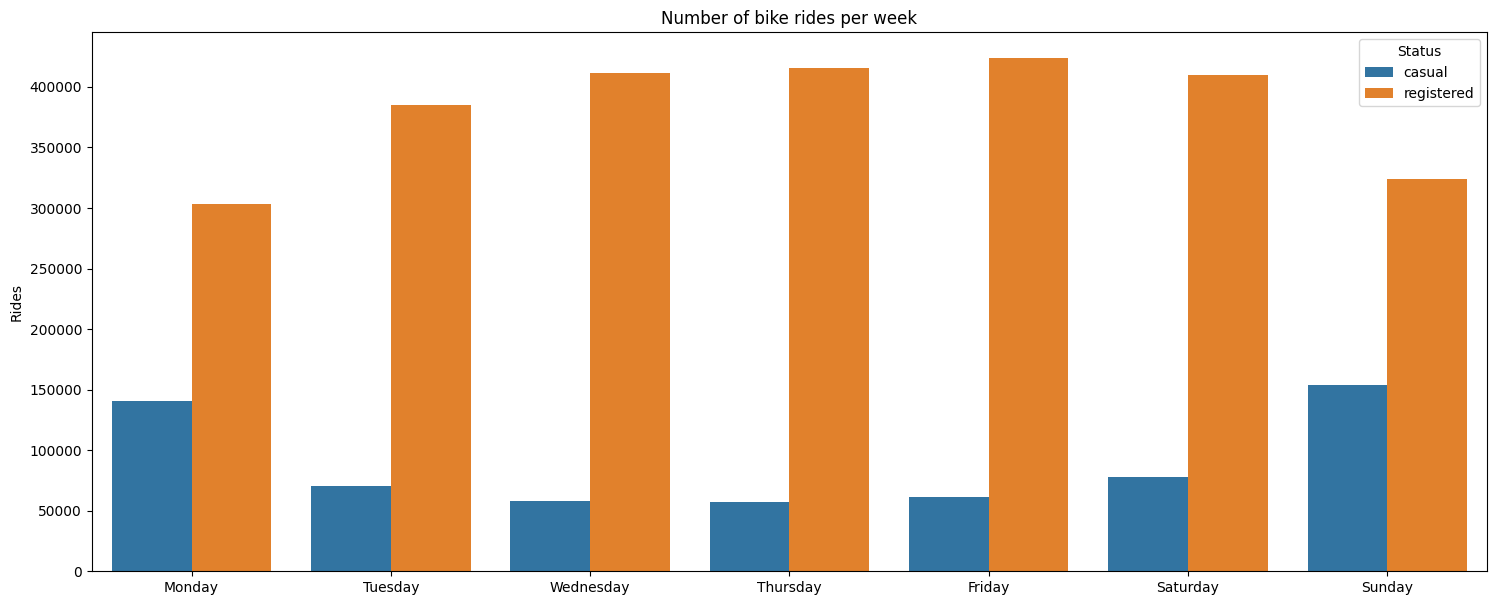

In [38]:
plt.subplots(figsize=(18, 7))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='weekday', y='count', data=weekly_bike_usage, order=day_order, hue='status')

plt.xlabel(None)
plt.ylabel("Rides")
plt.title("Number of bike rides per week")
plt.legend(loc='upper right', fontsize=10, title='Status')

plt.show()

**Insight:**
- There is a significant difference in bike-share rides numbers between casual and registered users.
- The highest usage for registered users occurs on Friday, with a total of 423,935 rides.
- In contrast, the highest usage for casual users rides occurs on Sunday, with a total of 153,852 rides.
- It is likely that many casual users take the opportunity to use it for exploring the city, due to the weekend.

### Question 3: What is the usage pattern of bike-sharing rides based on month?

In [39]:
monthly_bike_usage = day.groupby("mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_bike_usage = monthly_bike_usage.reset_index()
monthly_bike_usage = monthly_bike_usage.melt(id_vars='mnth', value_vars=['casual', 'registered'], var_name='status', value_name='count')
monthly_bike_usage

,mnth,status,count
0,April,casual,60802
1,August,casual,72039
2,December,casual,21693
3,February,casual,14963
4,January,casual,12042
5,July,casual,78157
6,June,casual,73906
7,March,casual,44444
8,May,casual,75285
9,November,casual,36603


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


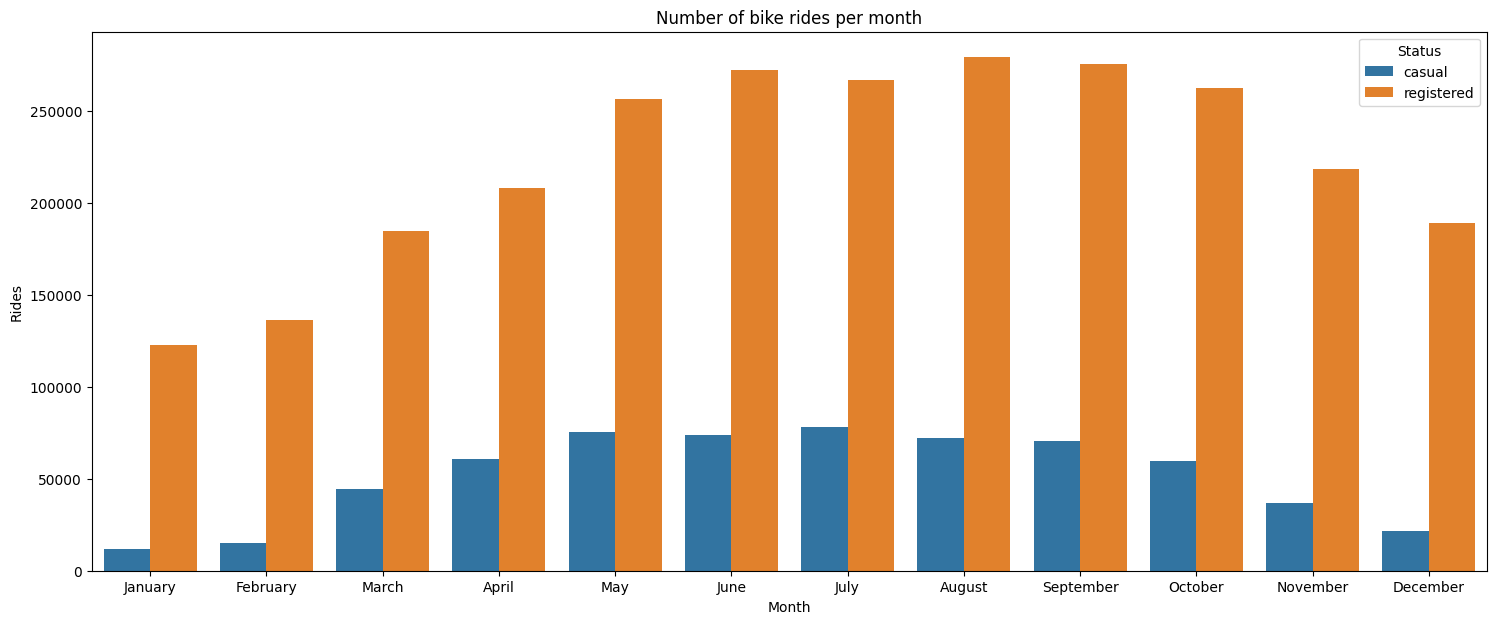

In [41]:
plt.subplots(figsize=(18, 7))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']
sns.barplot(x='mnth', y='count', data=monthly_bike_usage, order=month_order, hue='status')


plt.xlabel("Month")
plt.ylabel("Rides")
plt.title("Number of bike rides per month")
plt.legend(loc='upper right', fontsize=10, title='Status')

plt.show()

**Insight:**
- Bike-sharing rides experiences significant usage in June and September.
- However, starting in October, the number of rides began to decline, reaching its lowest point in January.
- Usage begins to rise again in February.
- It seems that the season affects usage for both casual and registered users.

### Question 4: Does weather and season affect bikeshare usage?

In [42]:
weather_bike_usage = hour.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weather_bike_usage = weather_bike_usage.reset_index()
weather_bike_usage = weather_bike_usage.melt(id_vars='weathersit', value_vars=['casual', 'registered'], var_name='status', value_name='count')
weather_bike_usage

,weathersit,status,count
0,Clear,casual,462745
1,Heavy Rain,casual,8
2,Light Snow,casual,22783
3,Mist,casual,134481
4,Clear,registered,1875428
5,Heavy Rain,registered,215
6,Light Snow,registered,135548
7,Mist,registered,661471


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


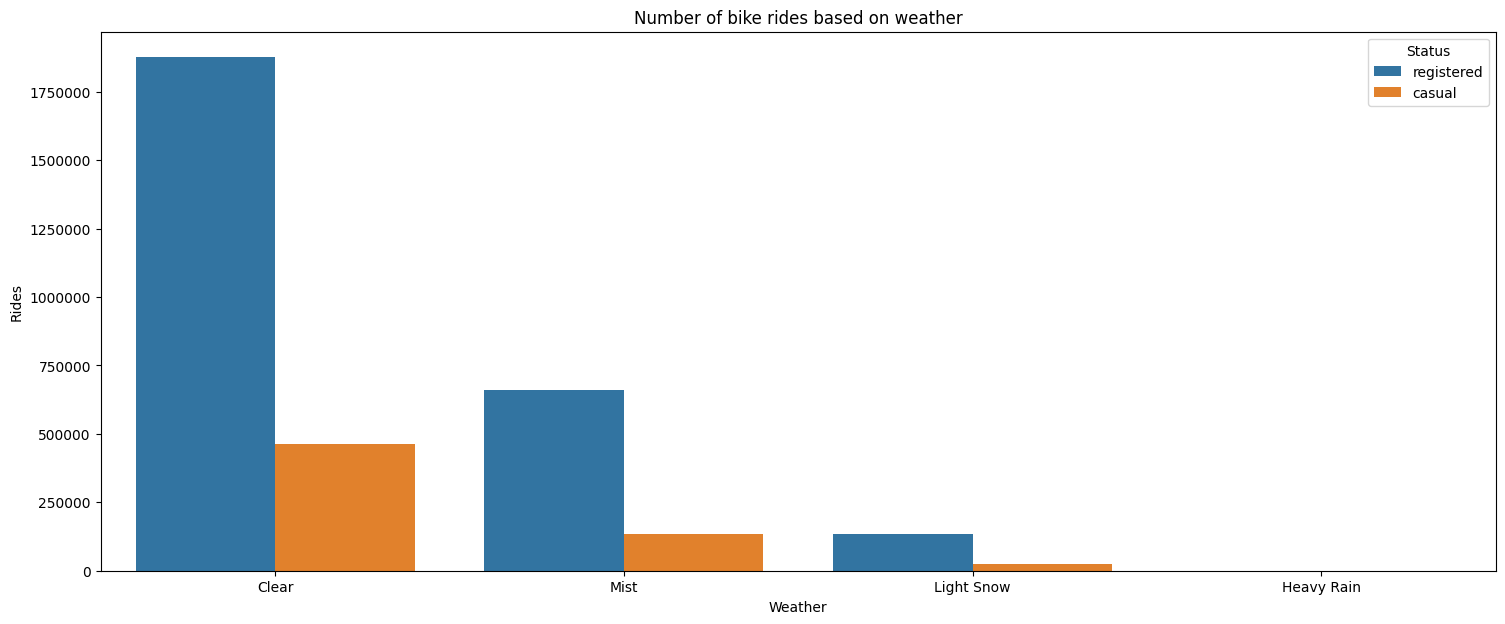

In [43]:
plt.subplots(figsize=(18, 7))

sns.barplot(x='weathersit', y='count', data=weather_bike_usage.sort_values(by='count', ascending=False), hue='status')


plt.xlabel("Weather")
plt.ylabel("Rides")
plt.title("Number of bike rides based on weather")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right', fontsize=10, title='Status')

plt.show()

In [44]:
season_bike_usage = hour.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

season_bike_usage = season_bike_usage.reset_index()
season_bike_usage = season_bike_usage.melt(id_vars='season', value_vars=['casual', 'registered'], var_name='status', value_name='count')
season_bike_usage

,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


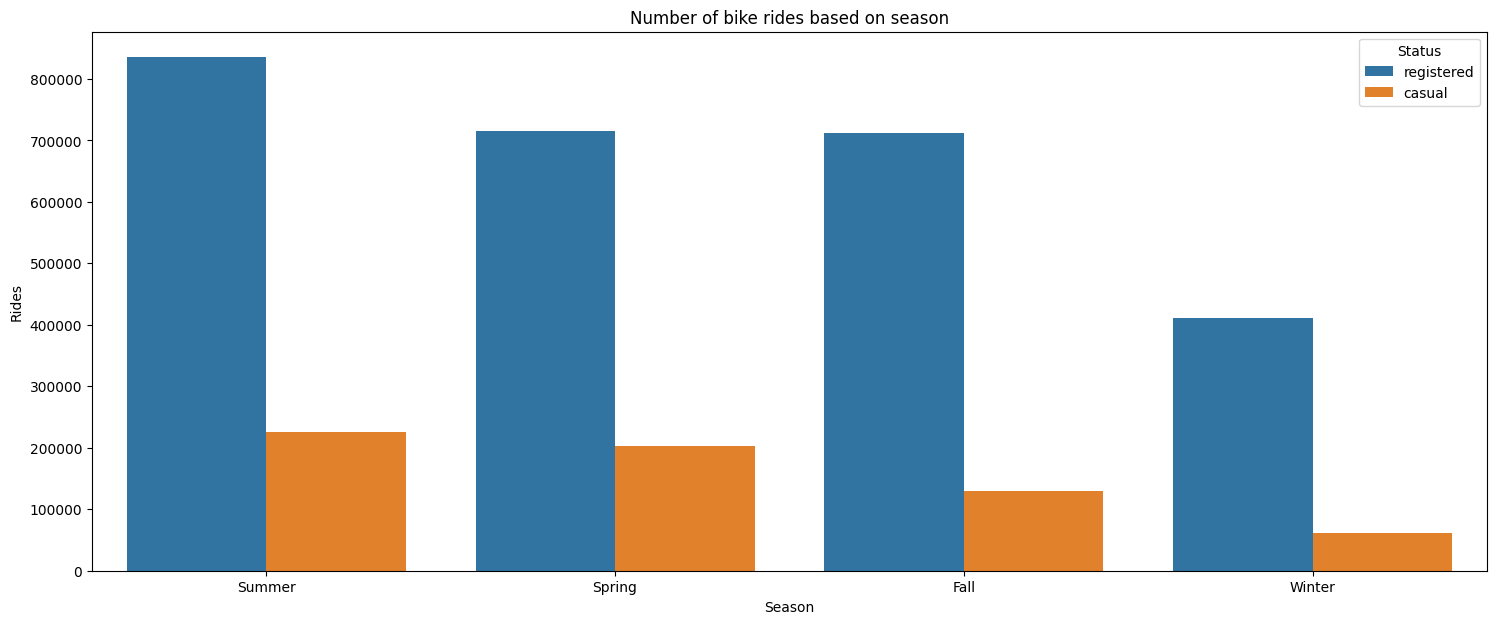

In [45]:
plt.subplots(figsize=(18, 7))

sns.barplot(x='season', y='count', data=season_bike_usage.sort_values(by='count', ascending=False), hue='status')


plt.xlabel("Season")
plt.ylabel("Rides")
plt.title("Number of bike rides based on season")
plt.legend(loc='upper right', fontsize=10, title='Status')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

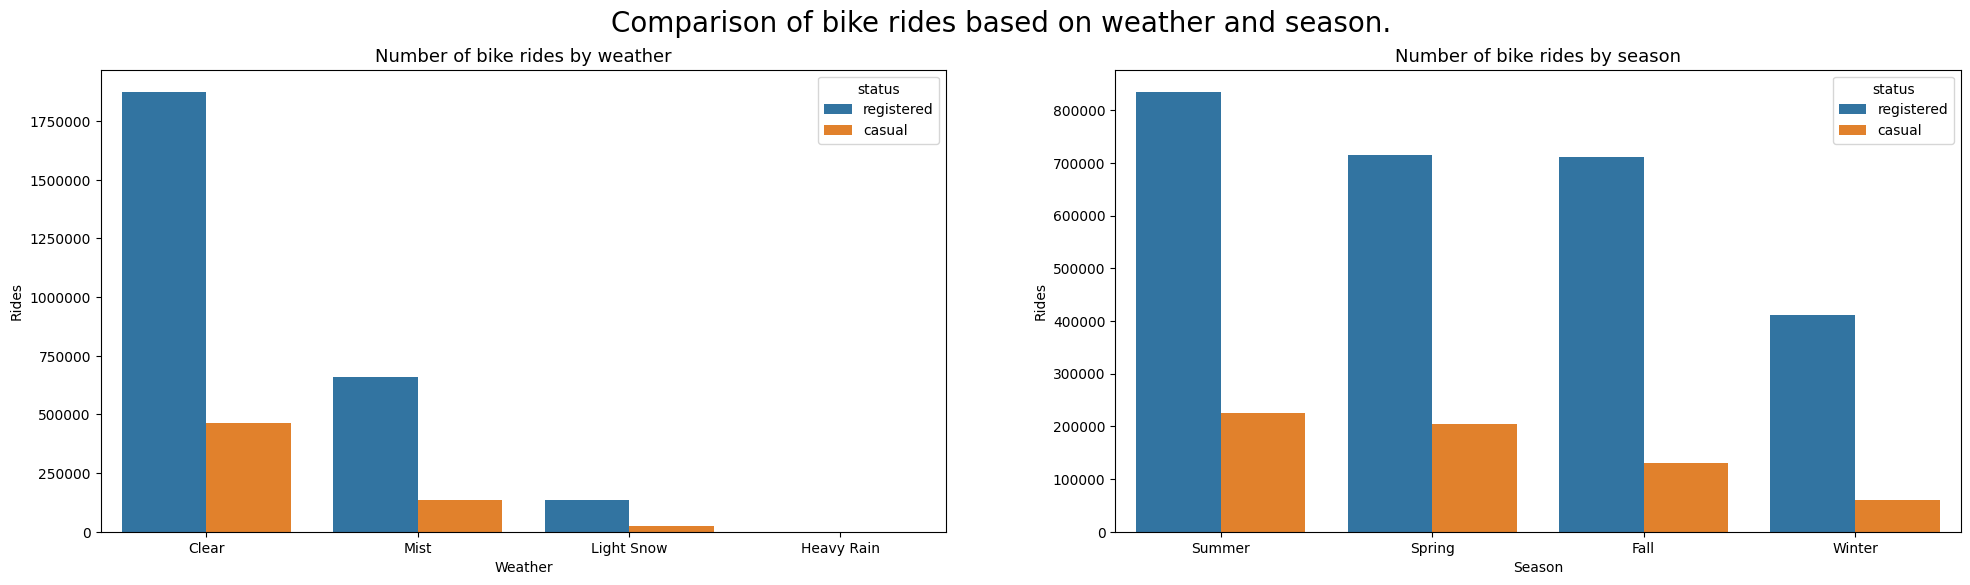

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x='weathersit', y='count', data=weather_bike_usage.sort_values(by='count', ascending=False), hue='status', ax=ax[0])
ax[0].set_title("Number of bike rides by weather", loc="center", fontsize=13)
ax[0].set_ylabel("Rides")
ax[0].set_xlabel("Weather")
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(x='season', y='count', data=season_bike_usage.sort_values(by='count', ascending=False), hue='status', ax=ax[1])
ax[1].set_title("Number of bike rides by season", loc="center", fontsize=13)
ax[1].set_ylabel("Rides")
ax[1].set_xlabel("Season")

plt.suptitle("Comparison of bike rides based on weather and season.", fontsize=20)
plt.show()

**Insight:**
- Weather conditions is greatly influence the number of bike-share rides.
- There are significantly fewer rides during heavy rain compared to pleasant weather.
- Based on season, bike-share rides peak in the summer season and reach their lowest point in the winter season.

## Conclusion

---



* **How does the time of day influence bike-sharing ride usage?**


> The analysis indicates that registered bike-share users primarily use the service for commuting during peak hours in the morning and evening, while casual users demonstrate greater flexibility in their usage throughout the day, particularly enjoying rides during daylight hours until early evening.


* **What are the trends in bike-sharing rides across different days of the week?**


> The data reveals a notable distinction in bike-share usage between casual and registered users, with registered users showing peak usage on Fridays and casual users on Sundays, suggesting that many casual users utilize the service for city exploration during the weekend.


* **How does bike-sharing usage vary by month?**


> The analysis indicates that bike-sharing rides are heavily utilized in June and September, but there is a noticeable decline starting in October, reaching the lowest point in January, before rising again in February, suggesting that seasonal changes significantly influence usage patterns for both casual and registered users.


* **Do weather and seasonal changes impact bike-share ridership?**


> The analysis demonstrates that weather conditions significantly impact the number of bike-share rides, with notable reductions during heavy rain compared to pleasant weather, and a clear seasonal pattern where bike-share usage peaks in the summer and is at its lowest in the winter.



## Export Clean Dataset

---



In [48]:
hour.to_csv("hour_clean.csv", index=False)
day.to_csv("day_clean.csv", index=False)